# Filter the results of MORO
Decide based on poitical constraints which results of MORO are not going to be considered in the next steps of the analysis. 

Define the parameters of the MORO run that is going to be evaluated and load the packages that are going to be used. 

In [1]:
from problem_formulation import get_model_for_problem_formulation
dike_model, planning_steps = get_model_for_problem_formulation(2) 

C:\Users\georg\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
import pandas as pd

n_scenarios = 60
nfe = 6000
epsilons = [0.01, 0.01, 0.01, 0.01, 0.01]

In [3]:
archive = pd.read_csv(f"Outputs/robust_optimization/Archive{n_scenarios}scen{nfe}nfe{epsilons}", index_col=0)
convergence = pd.read_csv(f"Outputs/robust_optimization/Convergence{n_scenarios}scen{nfe}nfe{epsilons}", index_col=0)

In [4]:
# Initial solutions 

levers = archive.loc[:, [l.name for l in dike_model.levers]]
levers.T

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0_RfR 0,1,1,0,1,1,1,1,1,1,1,...,0,1,0,1,1,1,0,1,1,1
0_RfR 1,1,0,0,0,1,1,1,1,1,0,...,0,0,0,1,1,1,1,1,1,1
1_RfR 0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1_RfR 1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
2_RfR 0,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,0,1,1,1
2_RfR 1,0,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,0,1,1,0,1
3_RfR 0,1,0,1,1,1,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,1
3_RfR 1,0,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4_RfR 0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4_RfR 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
solutions = archive[archive['EWS_DaysToThreat'] == 0]
solutions = solutions

In [15]:
display(solutions)

,0_RfR 0,0_RfR 1,1_RfR 0,1_RfR 1,2_RfR 0,2_RfR 1,3_RfR 0,3_RfR 1,4_RfR 0,4_RfR 1,...,A.3_DikeIncrease 1,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.5_DikeIncrease 0,A.5_DikeIncrease 1,Robustness metric Damage,Robustness metric Dike Costs,Robustness metric RfR Costs,Robustness metric Evacuation Costs,Robustness metric Deaths
0,1,1,0,0,1,0,1,0,0,0,...,0,9,0,9,0,0.916667,0.246383,0.3211,0.0,0.916667
1,1,0,0,0,1,1,0,1,0,0,...,0,10,3,9,0,0.966667,0.314642,0.2672,0.0,0.966667
2,0,0,0,0,1,1,1,1,0,0,...,0,9,2,10,0,0.966667,0.296748,0.3038,0.0,0.966667
4,1,1,1,0,1,1,1,1,0,0,...,0,9,2,10,0,0.983333,0.281166,0.6908,0.0,0.983333
5,1,1,0,0,1,1,1,0,0,0,...,0,9,0,9,0,0.933333,0.249707,0.3518,0.0,0.933333
6,1,1,0,0,1,1,1,0,0,0,...,0,9,0,9,0,0.866667,0.229366,0.3518,0.0,0.866667
7,1,1,0,1,1,1,0,1,0,0,...,0,9,0,9,0,0.916667,0.234554,0.5696,0.0,0.916667
9,1,0,0,0,1,1,1,0,0,0,...,0,9,0,9,0,0.816667,0.229366,0.2672,0.0,0.816667
11,1,0,0,0,1,1,1,0,0,0,...,0,9,0,9,0,0.883333,0.246383,0.2672,0.0,0.883333
13,0,0,0,0,1,1,0,0,0,0,...,0,9,0,10,0,0.900000,0.278667,0.0614,0.0,0.900000


In [16]:
solutions.to_csv(f"Solutions{nfe}nfe{n_scenarios}scen{epsilons}eps")

In [22]:
robustness = solutions.iloc[:,-5:]
robustness

,Robustness metric Damage,Robustness metric Dike Costs,Robustness metric RfR Costs,Robustness metric Evacuation Costs,Robustness metric Deaths
0,0.916667,0.246383,0.3211,0.0,0.916667
1,0.966667,0.314642,0.2672,0.0,0.966667
2,0.966667,0.296748,0.3038,0.0,0.966667
4,0.983333,0.281166,0.6908,0.0,0.983333
5,0.933333,0.249707,0.3518,0.0,0.933333
6,0.866667,0.229366,0.3518,0.0,0.866667
7,0.916667,0.234554,0.5696,0.0,0.916667
9,0.816667,0.229366,0.2672,0.0,0.816667
11,0.883333,0.246383,0.2672,0.0,0.883333
13,0.900000,0.278667,0.0614,0.0,0.900000


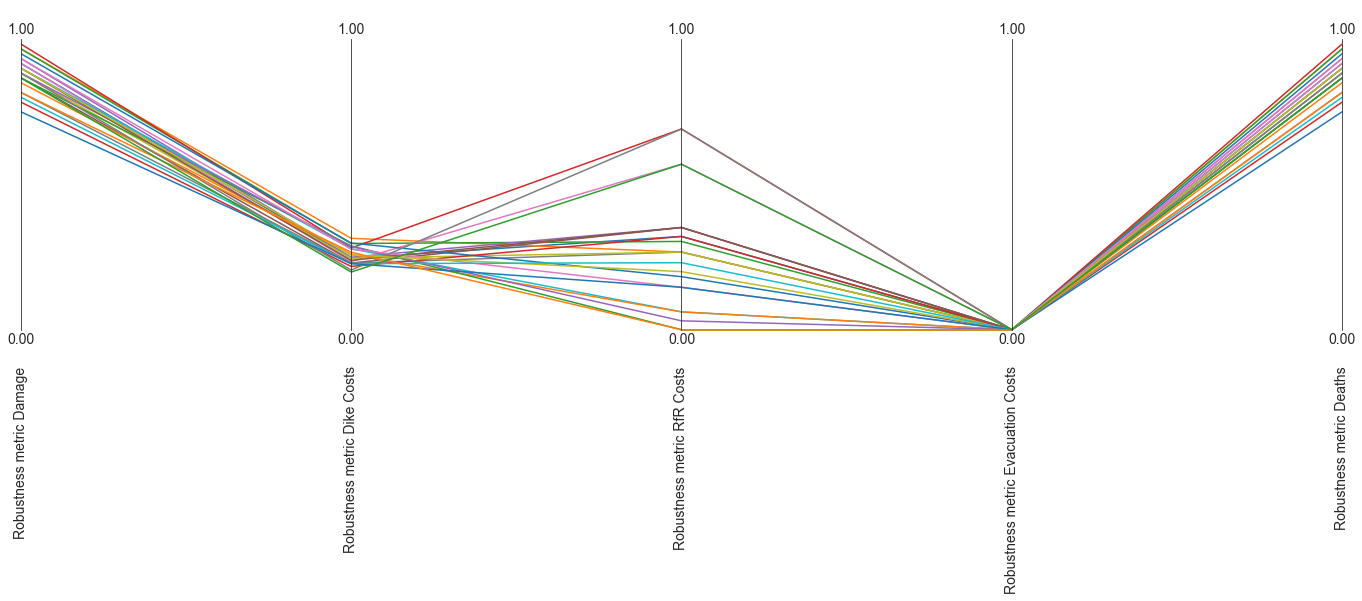

In [35]:
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

# experiments, outcomes = results

# funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
#          'Expected Annual Damage': Expected_Annual_Damage,
#          'Total Investment Costs': Total_Investment_Costs}

# total_scores = {}
# for policy in np.unique(experiments['policy']):
#     scores = {}
#     logical = experiments['policy'] == policy
    
#     temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
#     for k, v in temp_outcomes.items():
#         score = funcs[k](v)
#         scores[k] = score
#     total_scores[policy] = scores

# data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(robustness)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(robustness)
paraxes.fig.set_size_inches(20,50)
plt.show()
